## Observations and Insights 

In [146]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [147]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [148]:
list(mouse_metadata.columns.values)

['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']

In [149]:
list(study_results.columns.values)

['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']

In [150]:
# Combine the data into a single dataset
pymaceuticals_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [151]:
# Checking the number of mice in the DataFrame.
mice_count = len(pymaceuticals_df["Mouse ID"].unique())
mice_count

249

In [152]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pymaceuticals_df.loc[pymaceuticals_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [153]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = pymaceuticals_df[pymaceuticals_df["Mouse ID"] == 'g989'] 
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [154]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pymaceuticals_df[pymaceuticals_df["Mouse ID"].isin(duplicate_mouse) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [155]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(clean_df["Mouse ID"].unique())
mice_count_clean

248

## Summary Statistics

In [157]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

# summary_df = clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].map("{:,.2f}".format)
median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].map("{:,.2f}".format)
variance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].map("{:,.2f}".format)
sd = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].map("{:,.2f}".format)
sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].map("{:,.2f}".format)

analysis_df=pd.DataFrame({"mean":mean,"median":median,"variance":variance, "σ": sd, "SEM": sem})

analysis_df

,mean,median,variance,σ,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [161]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

analysis_df.groupby(["Drug Regimen"]).describe().unstack().reset_index()

analysis_df

,mean,median,variance,σ,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

In [162]:
%matplotlib notebook

In [164]:
clean_df.Timepoint.unique() 

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [165]:
list(clean_df.columns.values)

['Mouse ID',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites']

<IPython.core.display.Javascript object>


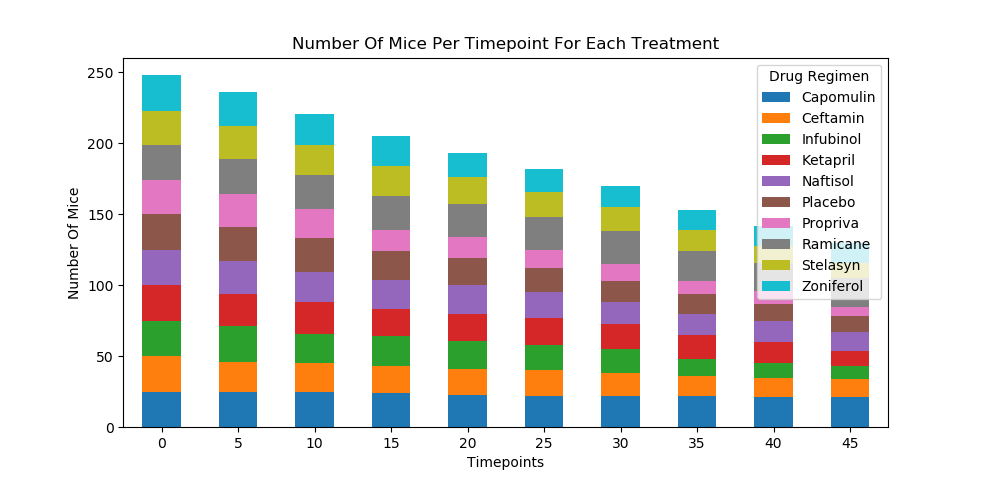

In [186]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pandas.
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

clean_df2 = clean_df.groupby(['Timepoint', 'Drug Regimen'])['Timepoint'].count().unstack('Drug Regimen').fillna(0)
clean_df2.plot.bar(stacked=True);

# Title, labels, Formatting
plt.title("Number Of Mice Per Timepoint For Each Treatment")
plt.ylabel("Number Of Mice")
plt.xlabel("Timepoints")
plt.xticks(rotation=0, horizontalalignment="center")
# plt.legend(frameon=False);

plt.show()

In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pyplot.
# https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/bar_stacked.html

clean_df["Drug Regimen"].unique()

# A python dictionary

data = clean_df["Drug Regimen"];

index = clean_df("Timepoints");

 

# Dictionary loaded into a DataFrame

dataFrame = pd.DataFrame(data=data, index=index);

 

# Draw a vertical bar chart

dataFrame.plot.bar(stacked=True,rot=15, title="Annual Production Vs Annual Sales");

plt.show()

In [214]:
# data = np.array([[5., 30., 45., 22.],
#   [5., 25., 50., 20.],
#   [1.,  2.,  1.,  1.]]

# #color_list = ['b', 'g', 'r']

# X = np.arange(data.shape[1])
# for i in range(data.shape[0]):
#   plt.bar(X, data[i],
#     bottom = np.sum(data[:i], axis = 0),
#     #color = color_list[i % len(color_list)])

# plt.show()

SyntaxError: invalid syntax (<ipython-input-214-ea4fe2ceba93>, line 7)

In [229]:
x = np.arange(clean_df["Drug Regimen"])
x

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [226]:
# x_axis = clean_df["Drug Regimen"].unique
# y_axis = clean_df["Timepoint"]
# z = y_axis.groupby(clean_df["Timepoint"]).count()

# z.plot.bar(stacked=True)

x = np.arange(clean_df["Drug Regimen"])
for i in range(data.shape[0]):
  plt.bar(x, data[i],
    bottom = np.sum(data[:i], axis = 0),
    #color = color_list[i % len(color_list)])

# Title, labels, Formatting
# plt.title("Number Of Mice Per Timepoint For Each Treatment")
# plt.ylabel("Number Of Mice")
# plt.xlabel("Timepoints")
# plt.xticks(rotation = 0, horizontalalignment="center")
# plt.legend(frameon = True)

# plt.show()

# drug_counts = clean_df["Drug Regimen"].value_counts()

# # Creating variables for my axis
# x_axis = np.arange(0,len(y_axis),1)
# for x in x_axis:
#     tick_locations.append(x)
    
# y_axis = drug_counts.values
# # x_axis = drug_counts.index
                 
# # Needs to be matplotlib
# plt.bar(x_axis, y_axis, color='r', alpha=1, align= "center", width= .5)

SyntaxError: unexpected EOF while parsing (<ipython-input-226-d2cdff11aacc>, line 33)

## Pie Plots

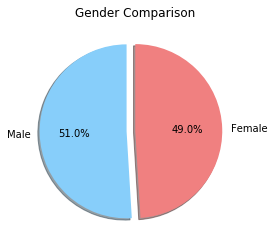

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf_count=clean_df["Sex"].value_counts()

#Labels for each section
labels=mf_count.index

#Values of each section 
sizes=mf_count.values

#Colors of each section

colors=["lightskyblue", "lightcoral"]

#Exploiding the male column

explode=[0.1,0]

#Using Pandas to print

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#Formatting
plt.title("Gender Comparison")
plt.show()

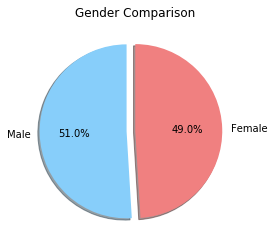

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_count=clean_df["Sex"].value_counts()

#Labels for each section
labels=mf_count.values

#Values of each section 
sizes=mf_count.values

#Colors of each section

colors=["lightskyblue", "lightcoral"]

#Exploiding the male column

explode=[0.1,0]

#Make into a pie chart

mf_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#Formatting
plt.title("Gender Comparison")
plt.ylabel(" ")
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
max_tumor=clean_df.groupby("Mouse ID").max().reset_index()

merge_data=max_tumor[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')

merge_data.round(2).head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.97,2,Infubinol,Female,20,23
1,a251,45,65.53,1,Infubinol,Female,21,25
2,a262,45,70.72,4,Placebo,Female,17,29
3,a275,45,63.00,3,Ceftamin,Female,20,28
4,a366,30,63.44,1,Stelasyn,Female,16,29


In [35]:
# 4 regis: Capomulin, Ramicane, Infubinol, Ceftamin
capomulin= merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merge_data.loc[merge_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merge_data.loc[merge_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merge_data.loc[merge_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

#Capomulin quartiles
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap

#Infubionol Outliers
lower_ocap= lower_cap-(1.5*iqr)
upper_ocap= upper_cap+(1.5*iqr)

#Ramicane quartiles
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr= upper_ram-lower_ram
#Ramicane Outliers
lower_oram= lower_ram-(1.5*iqr)
upper_oram= upper_ram+(1.5*iqr)

#Infubionol quartiles
quartile_in=infubinol.quantile([.25,.5,.75])
lower_in= quartile_in[.25]
upper_in=quartile_in[.75]
iqr= upper_in-lower_in

#Infubionol Outliers
lower_oin= lower_in-(1.5*iqr)
upper_oin= upper_in+(1.5*iqr)

#Ceftmain quartiles
quartile_ce=ceftamin.quantile([.25,.5,.75])
lower_ce= quartile_ce[.25]
upper_ce=quartile_ce[.75]
iqr= upper_ce-lower_ce

#Ceftmain Outliers
lower_oce= lower_ce-(1.5*iqr)
upper_oce= upper_ce+(1.5*iqr)

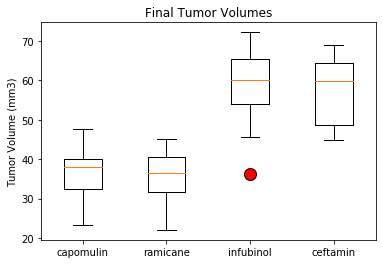

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)

#Make Box Plot
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops= orange_out)

#Formatting
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

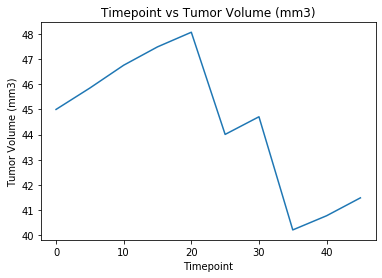

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse= clean_df.loc[clean_df['Mouse ID'] == 'l509']



plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

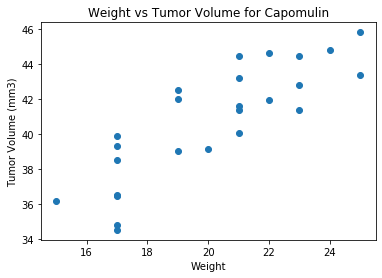

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

cap_avg=capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

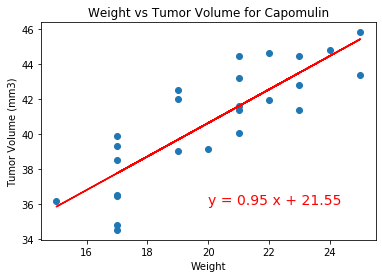

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values=cap_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), color='red', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

In [41]:
print(f"Correlation between these two variables is {round(rvalue,2)}")

Correlation between these two variables is 0.84


In [42]:
{round(rvalue,2)}

{0.84}

In [43]:
(rvalue)

0.8419363424694718

In [230]:
rvalue

0.8419363424694718